# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `numpy` и `matplotlib`.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [2]:
def get_weights(X, Y, alpha):
    return np.expand_dims(np.linalg.inv(X.T.dot(X) + alpha * np.identity(5)).dot(X.T).dot(Y), axis = 0)

In [20]:
def predict(X, W):
    return X.dot(W.T)

In [3]:
def MSE(prediction, labels):
    return np.sum((prediction.squeeze() - labels) ** 2) / prediction.shape[0]

In [4]:
X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

In [21]:
alphas = np.linspace(1e-3, 1000, 10000)

In [22]:
res = np.array([MSE(predict(X, get_weights(X, Y, x)), Y) for x in alphas])

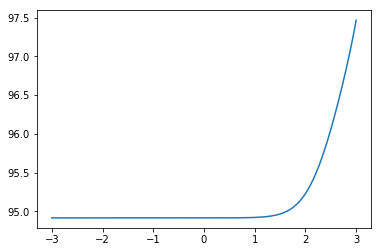

In [23]:
plt.plot(np.log10(alphas), res)

In [151]:
def cv(X, Y, param, cv = 5):
    train_res = []
    test_res = []
    
    split = np.array_split(np.arange(X.shape[0]), 5)    
    
    for i in range(cv):
        if i == 0:
            train_indeces = np.concatenate(split[1:])
        elif i == cv - 1:
            train_indeces = np.concatenate(split[:cv - 1])
        else:
            train_indeces = np.concatenate([np.concatenate(split[:i]), np.concatenate(split[i + 1:])])
        test_indeces = split[i]

        X_train = X[train_indeces]
        y_train = Y[train_indeces]
        X_test = X[test_indeces]
        y_test = Y[test_indeces]
        W = get_weights(X_train, y_train, param)
        
        train_res.append(MSE(predict(X_train, W), y_train))
        test_res.append(MSE(predict(X_test, W), y_test))
        
    return sum(train_res) / len(train_res), sum(test_res) / len(test_res)

In [152]:
alphas = np.linspace(1e-2, 100, 1000)

In [153]:
cv_score = np.array([cv(X, Y, x) for x in alphas])

In [155]:
train_score = [x[0] for x in cv_score]
test_score = [x[1] for x in cv_score]

In [156]:
alphas[np.argmin(test_score)]

5.114594594594594

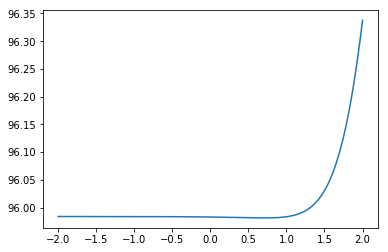

In [159]:
plt.plot(np.log10(alphas), test_score)

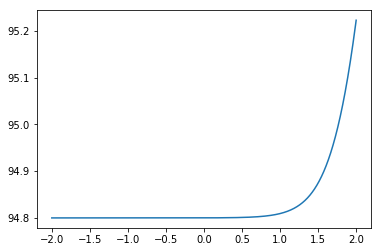

In [160]:
plt.plot(np.log10(alphas), train_score)